In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
# path = "Data_ccr/par_set_1_psd/vrun5/" ## -------> Nskip = 8
# path = "Data_ccr/par_set_1_psd/vrun3/" ## -------> Nskip = 4
path = "Data_ccr/par_set_2_psd/vrun2_40/"
Alldata = np.loadtxt(path + "delta_f2py_test.dat")
print(np.shape(Alldata))
nn = np.size(Alldata,0)
print(nn)
Vt_up = Alldata[0:nn,0]
# T_up = Alldata[0:nn,0]
# Es_up = Alldata[:,9]
# Js_up = Alldata[:,10]
R_up = Alldata[0:nn,7]

print(Vt_up)
Vcrit = 781.2



(75, 11)
75
[ 12.6  25.2  37.8  50.4  63.   75.6  88.2 100.8 113.4 126.  138.6 151.2
 163.8 176.4 189.  201.6 214.2 226.8 239.4 252.  264.6 277.2 289.8 302.4
 315.  327.6 340.2 352.8 365.4 378.  390.6 403.2 415.8 428.4 441.  453.6
 466.2 478.8 491.4 504.  516.6 529.2 541.8 554.4 567.  579.6 592.2 604.8
 617.4 630.  642.6 655.2 667.8 680.4 693.  705.6 718.2 730.8 743.4 756.
 768.6 781.2 793.8 806.4 819.  831.6 844.2 856.8 869.4 882.  894.6 907.2
 919.8 932.4 945. ]


In [4]:
inputs = open(path+"input_par.dat", "r")

print(inputs.read())




{'g6': 0.0, 'g4': 1.0, 'g2': 1.0, 'coef': 0.1, 'nskip': 8, 'tloop': False, 'dphi': 0.2, 'Tc': 1.0, 'mfphi': False, 'r0': 2.0, 'Rload': 1.0, 'nwarm': 400000, 'my': 64, 'mx': 64, 'gamma': 0.1}{'Tbath': 0.4, 'seed': 445921, 'maxE': 15.2, 'nmeas': 4096, 'dTb': 0.01, 'dE': 0.2, 'minT': 0.01, 'Tcrit': 0.55, 'maxT': 0.81, 'minE': 0.2}


(75, 4, 8192) (75, 8192)


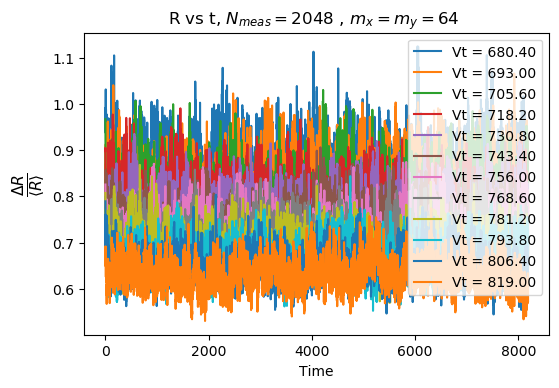

In [5]:
# NP = 2
# nmeas = 16384

# NP = 1
# nmeas = 32768

# NP = 8
# nmeas = 4096

NP = 4
nmeas = 8192

# NP = 16
# nmeas = 2048

kk = 0
Tdata = []
dRData = []
for i in range(nn):
    tdata = np.loadtxt(path + "t_data_" + str(i) + ".dat")
    tdata = tdata.reshape((NP,nmeas))
    R0 = np.mean(tdata,axis=1)
    R0 = R0.reshape((NP,1))
    R0 = np.dot(R0,np.ones((1,nmeas)))
#     print(R0)
    delR = tdata - R0
    Tdata.append(tdata)
    dRData.append(delR[kk,:]/R0[kk,:])
#     plt.plot(delR[kk,:]/R0[kk,:] , label = "Vt = " + format(Vt_up[i], '.2f') )
    if Vt_up[i] > 680.0 and Vt_up[i] < 820.:
        plt.plot(tdata[kk,:], label = "Vt = " + format(Vt_up[i], '.2f') )


    
Tdata = np.array(Tdata)
RData = Tdata[:,kk,:]
dRData = np.array(dRData)
print(np.shape(Tdata), np.shape(dRData))
plt.xlabel("Time")
plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 16)
# plt.ylabel("R")
# # plt.ylim(0,10)
plt.legend()
plt.title("R vs t, $N_{meas} = 2048$ , $m_x = m_y = 64$  ")
# # plt.savefig(path+"Rvt.pdf")
plt.show()

23 34 39 73


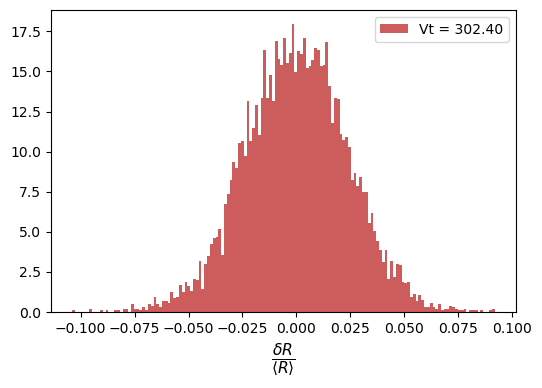

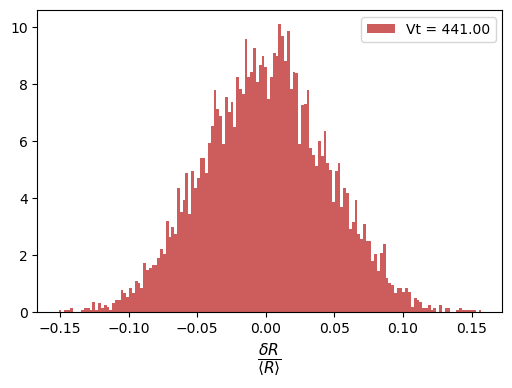

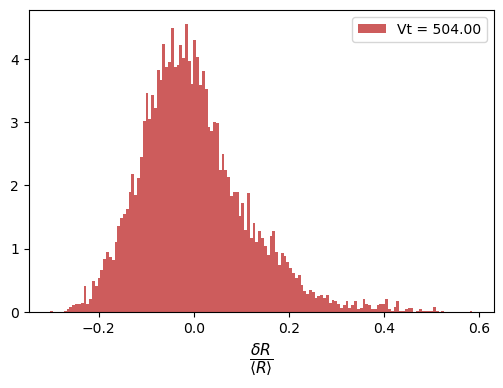

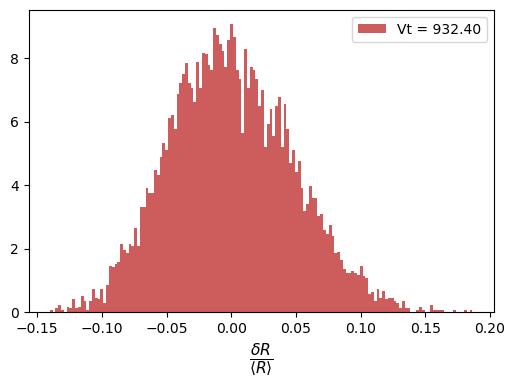

In [7]:
# k1 = int(np.argwhere(Vt_up//1 == 302))
# k2 = int(np.argwhere(Vt_up//1 == 680))
# k3 = int(np.argwhere(Vt_up//1 == 705))
# k4 = int(np.argwhere(Vt_up//1 == 743))
# k5 = int(np.argwhere(Vt_up//1 == 932))
# print(k1,k2,k3,k4,k5)
# karr = np.array([k1,k2,k3,k4,k5])


Vcrit = 478.8
k1 = int(np.argwhere(Vt_up//1 == 302))
k2 = int(np.argwhere(Vt_up//1 == 441))
k3 = int(np.argwhere(Vt_up//1 == 504))
k4 = int(np.argwhere(Vt_up//1 == 932))
print(k1,k2,k3,k4)
karr = np.array([k1,k2,k3,k4])




for kk in karr:
    plt.figure()
#     _, bins1, _ = plt.hist(Tdata[kk,0,:],bins=100, density=True, label = "Vt = " + format(Vt_up[kk], '.2f'))
    _, bins1, _ = plt.hist(dRData[kk,:],bins=150, color='IndianRed', density=True, label = "Vt = " + format(Vt_up[kk], '.2f'))
    mu1, sigma1 = stats.norm.fit(dRData[kk,:])
    best_fit_line1 = stats.norm.pdf(bins1, mu1, sigma1)
    # print(best_fit_line)    
#     plt.plot(bins1, best_fit_line1, color = 'black')
    # plt.xlabel("Time")
    plt.xlabel(r'$\frac{\delta R}{\langle R \rangle}$', fontsize = 16)
#     plt.xlim(-1.,1.)
    plt.legend()
    plt.savefig(path+'hist_'+format(Vt_up[kk], '.2f')+'_.pdf', bbox_inches='tight')

plt.show()    